# **Automatidata project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

The data consulting firm Automatidata has recently hired you as the newest member of their data analytics team. Their newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi fare amounts. You’ve impressed your Automatidata colleagues with your hard work and attention to detail. The data team believes that you are ready to build the regression model and update the client New York City TLC about your progress.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 5 End-of-course project: Build a multiple linear regression model

In this activity, you will build a multiple linear regression model. As you've learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed. 

Completing this activity will help you practice planning out and buidling a multiple linear regression model based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2:** Model Building and evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

# Build a multiple linear regression model

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: **Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.


### Task 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [ ]:
# Imports
# Packages for numerics + dataframes
### YOUR CODE HERE ###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import scipy.stats as stats
import statsmodels.api as sm
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

# Packages for visualization
### YOUR CODE HERE ###

# Packages for date conversions for calculating trip durations
### YOUR CODE HERE ###

# Packages for OLS, MLR, confusion matrix
### YOUR CODE HERE ###

**Note:** `Pandas` is used to load the NYC TLC dataset. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [ ]:
# Load dataset into dataframe 
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") 

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a multiple linear regression model?


==> ENTER YOUR RESPONSE HERE 

### Task 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

Start with `.shape` and `.info()`.

In [ ]:
# Start with `.shape` and `.info()`
### YOUR CODE HERE ###
df0.shape
df0.info()

Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [ ]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
### YOUR CODE HERE ###
df0.isna().sum()
df0.drop_duplicates()

Use `.describe()`.

In [ ]:
# Use .describe()
### YOUR CODE HERE ###
df0.describe()

### Task 2b. Convert pickup & dropoff columns to datetime


In [ ]:
# Check the format of the data
### YOUR CODE HERE ###
df0['tpep_pickup_datetime']=df0['tpep_pickup_datetime'].apply(lambda x: datetime.datetime.strptime(x,'%m/%d/%Y %H:%M:%S %p'))
df0['tpep_dropoff_datetime']=df0['tpep_dropoff_datetime'].apply(lambda x: datetime.datetime.strptime(x,'%m/%d/%Y %H:%M:%S %p'))

In [ ]:
# Convert datetime columns to datetime
### YOUR CODE HERE ###

### Task 2c. Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [ ]:
# Create `duration` column
### YOUR CODE HERE ###
df0['duration']=df0['tpep_dropoff_datetime']-df0['tpep_pickup_datetime']
df0['duration']=df0['duration'].apply(lambda x: x.total_seconds())
df0['duration']=df0['duration'].apply(lambda x: x//60)
df0['duration']

|

### Outliers

Call `df.info()` to inspect the columns and decide which ones to check for outliers.

In [ ]:
### YOUR CODE HERE ###

df0.info()

Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



### Task 2d. Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

In [ ]:
### YOUR CODE HERE ###

fig,ax=plt.subplots(1,3,figsize=[32,8])
sns.boxplot(df0['trip_distance'],ax=ax[0])
sns.boxplot(df0['fare_amount'],ax=ax[1])
sns.boxplot(df0['duration'],ax=ax[2])


model=LabelEncoder()
df0['store_and_fwd_flag']=model.fit_transform(df0['store_and_fwd_flag'])
df0['store_and_fwd_flag']

**Questions:** 
1. Which variable(s) contains outliers? 

2. Are the values in the `trip_distance` column unbelievable?
# Yes it is unbelievable

3. What about the lower end? Do distances, fares, and durations of 0 (or negative values) make sense?
# Fare amount, durations doesn't make sense as they are outliers and they should be imputed 

==> ENTER YOUR RESPONSE HERE

### Task 2e. Imputations

#### `trip_distance` outliers

You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [ ]:
# Are trip distances of 0 bad data or very short trips rounded down?
### YOUR CODE HERE ###
unq_val=pd.Series(df0['trip_distance'].sort_values().unique().tolist())
unq_val.head(10)

#unq_val are rounded and are not precise values

The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [ ]:
### YOUR CODE HERE ###
len(df0['trip_distance'].sort_values()[df0['trip_distance'].sort_values()==0.00].values)

# the count of rides of trip_distaince is zero is 148

#### `fare_amount` outliers

In [ ]:
### YOUR CODE HERE ###

Percntile_25=np.percentile(df0['fare_amount'],0.25)
Percntile_75=np.percentile(df0['fare_amount'],0.75)
qi=Percntile_75+1.5*(Percntile_75-Percntile_25)
qi_1=Percntile_25-1.5*(Percntile_75-Percntile_25)
df0['fare_amount'].loc[df0['fare_amount']>3.75]
df0['fare_amount'].loc[df0['fare_amount']<1.75]
fare_amount_1=pd.concat([df0['fare_amount'].loc[df0['fare_amount']>3.75],df0['fare_amount'].loc[df0['fare_amount']<1.75]],axis=0)
fare_amount_1 # The outliers of fare_amount

**Question:** What do you notice about the values in the `fare_amount` column?

Impute values less than $0 with `0`.

In [ ]:
# Impute values less than $0 with 0
### YOUR CODE HERE ###
df0['fare_amount'][df0['fare_amount']<0]=0



In [ ]:
df0.dtypes['tpep_pickup_datetime']

Now impute the maximum value as `Q3 + (6 * IQR)`.

In [ ]:
### YOUR CODE HERE ###
'''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
'''
  ### YOUR CODE HERE ###
        # Reassign minimum to zero
        ### YOUR CODE HERE ###

for i in df0.columns:
    if df0[i].dtypes != '<M8[ns]':
        Percntile_75=np.percentile(df0[i],0.75)
        Percntile_25=np.percentile(df0[i],0.25)
        print(Percntile_25,Percntile_75)
        qi=Percntile_75+(6*(Percntile_75-Percntile_25))
        print(df0[i][df0[i]>qi])

        # Calculate upper threshold
     ### YOUR CODE HERE ###

        # Reassign values > threshold to threshold
      ### YOUR CODE HERE ###
    


#### `duration` outliers


In [ ]:
# Call .describe() for duration outliers
### YOUR CODE HERE ###
df0.describe()

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [ ]:
# Impute a 0 for any negative values
### YOUR CODE HERE ###
df0['duration'][df0['duration']<0]=0

In [ ]:
# Impute the high outliers
### YOUR CODE HERE ###
df0['fare_amount'].value_counts()

### Task 3a. Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


In [ ]:
# Create `pickup_dropoff` column
### YOUR CODE HERE ###
df0['PULocationID']=df0['PULocationID'].apply(lambda x: str(x))
df0['DOLocationID']=df0['DOLocationID'].apply(lambda x: str(x))
df0['pickup_dropoff']=tuple(zip(df0['PULocationID'],df0['DOLocationID']))
df0['pickup_dropoff']=df0['pickup_dropoff'].str.join(' ')
help(df0['PULocationID'].str.join)

In [ ]:
df0['pickup_dropoff']

Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [ ]:
### YOUR CODE HERE ###
grouped=df0.groupby('pickup_dropoff')['trip_distance'].mean()
grouped

`grouped` is an object of the `DataFrame` class.

1. Convert it to a dictionary using the [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information you want.

```
Example:
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of `trip_distance` as a key, so:

```
Example:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [ ]:
# 1. Convert `grouped` to a dictionary
### YOUR CODE HERE ###
grouped=dict(zip(df0['pickup_dropoff'],df0['trip_distance']))
grouped

# 2. Reassign to only contain the inner dictionary
### YOUR CODE HERE ###

1. Create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

2. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 'A B'        |
| 'C D'        |
| 'A B'        |
| 'D C'        |
| 'E F'        |

```
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
df['mean_distance`] = df['mean_distance'].map(grouped_dict)
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 1.25         |
| 2            |
| 1.25         |
| 3            |
| NaN          |

When used this way, the `map()` `Series` method is very similar to `replace()`, however, note that `map()` will impute `NaN` for any values in the series that do not have a corresponding key in the mapping dictionary, so be careful.

In [ ]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
### YOUR CODE HERE ###
df0['mean_distance']=df0['pickup_dropoff'].map(grouped)
df0['mean_distance']

# 2. Map `grouped_dict` to the `mean_distance` column
### YOUR CODE HERE ###

# Confirm that it worked
### YOUR CODE HERE ###
df0

#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [ ]:
### YOUR CODE HERE ###

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
### YOUR CODE HERE ###
grouped_1=df0.groupby('pickup_dropoff')['duration'].mean()
grouped_1
df0['mean_duration']=df0['pickup_dropoff'].map(grouped_1)
df0['mean_duration']
# Confirm that it worked
### YOUR CODE HERE ###
df0

#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [ ]:
# Create 'day' col
### YOUR CODE HERE ###
df0['day']=pd.to_datetime(df0['tpep_pickup_datetime']).dt.day_name()

df0['month']=df0['tpep_pickup_datetime'].apply(lambda x: x.month)

df0['tpep_pickup_hr']=df0['tpep_pickup_datetime'].apply(lambda x: x.hour)

# Create 'month' col
### YOUR CODE HERE ###

In [ ]:
df0

#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [ ]:
# Create 'rush_hour' col
df0['rush_hour'] = df0['tpep_pickup_datetime'].dt.hour

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df0.loc[df0['day'].isin(['saturday', 'sunday']), 'rush_hour'] = 0

In [ ]:
def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val

In [ ]:
# Apply the `rush_hourizer()` function to the new column
### YOUR CODE HERE ###
# Apply the `rush_hourizer()` function to the new column
df0.loc[(df0.day != 'saturday') & (df0.day != 'sunday'), 'rush_hour'] = df0.apply(rush_hourizer, axis=1)
df0.head()

### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

In [ ]:
# Create a scatterplot to visualize the relationship between variables of interest
### YOUR CODE HERE ###

sns.set(style='whitegrid')

f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x=df0['mean_duration'], y=df0['fare_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.title('Mean duration x fare amount')
plt.show()

The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

You know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [32]:
### YOUR CODE HERE ###
df0[df0['fare_amount'] > 50]['fare_amount'].value_counts().head()

52.0    514
59.0      9
50.5      9
57.5      8
51.0      7
Name: fare_amount, dtype: int64

Examine the first 30 of these trips.

In [45]:
# Set pandas to display all columns
### YOUR CODE HERE ###
pd.set_option('display.max_columns',123)
#df0=df0.drop('day',axis=1)
df0.dtypes

Unnamed: 0                        int64
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag                int64
PULocationID                     object
DOLocationID                     object
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
duration                        float64
pickup_dropoff                   object
mean_distance                   float64
mean_duration                   float64
day                              object
month                             int64
tpep_pickup_hr                    int64


**Question:** What do you notice about the first 30 trips?

==> ENTER YOUR RESPONSE HERE

### Task 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [35]:
### YOUR CODE HERE ###
formula='fare_amount ~ VendorID+passenger_count+trip_distance+C(payment_type)+total_amount+mean_distance+mean_duration'

model=sm.OLS.from_formula(formula,df0).fit()

In [36]:
### YOUR CODE HERE ###
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 1.138e+05
Date:                Mon, 08 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:32:26   Log-Likelihood:                -47312.
No. Observations:               22699   AIC:                         9.464e+04
Df Residuals:                   22689   BIC:                         9.472e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.9839      0.046    -21.254      0.000      -1.075      -0.893
C(payment_type)[T.2]     2.1522      0.028     76.869      0.000       2.097       2.207
C(payment_type)[T.3]     2.2833      0.178     12.818      0.000       1.934       2.633
C(payment_type)[T.4]     4.8434      0.288     16.836      0.000       4.280       5.407
VendorID                -0.0241      0.027     -0.890      0.374      -0.077       0.029
passenger_count          0.0142      0.010      1.362      0.173      -0.006       0.035
trip_distance            0.0696      0.013      5.242      0.000       0.044       0.096
total_amount             0.8201      0.001    649.920      0.000       0.818       0.823
mean_distance           -0.0959      0.013     -7.562      0.000      -0.121      -0.071
mean_duration            0.0008      0.000      5.642      0.000       0.001       0.001
==============================================================================
Omnibus:                    32408.809   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        146440730.521
Skew:                           7.499   Prob(JB):                         0.00
Kurtosis:                     396.204   Cond. No.                     2.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
X=df0[['VendorID','passenger_count','trip_distance','payment_type','total_amount','mean_distance','mean_duration']]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] 
vif = zip(X, vif) 
print(list(vif))

[('VendorID', 6.630847238323701), ('passenger_count', 2.8152369625282625), ('trip_distance', 22.983701495402393), ('payment_type', 4.986797918149058), ('total_amount', 4.754405759943315), ('mean_distance', 20.966367494148912), ('mean_duration', 1.1518680589447248)]


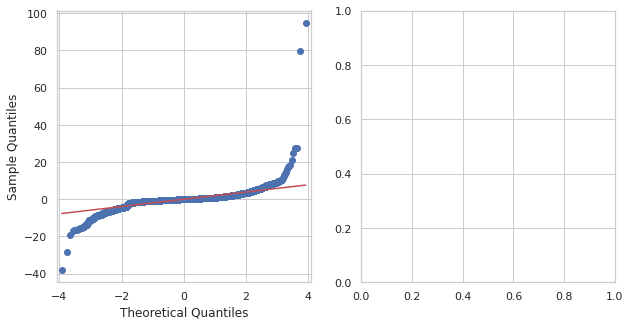

In [53]:
# multicollinearity is more with trip_distance, mean_distance but they have lower p value with the target feature, so we 
# won't try to remove those features. instead we will remove those feature that are not relevant to the dataset

residuals=model.resid
fig,ax=plt.subplots(1,2,figsize=[10,5])
sm.qqplot(residuals,line='s',ax=ax[0])
plt.show()

# the residuals are not normally distributed as they qq plot is not linear


### Task 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

In [ ]:
# Create a pairplot to visualize pairwise relationships between variables in the data
### YOUR CODE HERE ###
df0[['fare_amount','mean_duration','mean_distance']]

sns.pairplot(df0[['fare_amount','mean_duration','mean_distance']])


These variables all show linear correlation with each other. Investigate this further.

### Task 7. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [ ]:
# Correlation matrix to help determine most correlated variables
### YOUR CODE HERE ###

df0[['fare_amount','mean_duration','mean_distance']].corr()



Visualize a correlation heatmap of the data.

In [ ]:
# Create correlation heatmap
### YOUR CODE HERE ###
plt.figure(figsize=(6,4))
sns.heatmap(df0[['fare_amount','mean_duration','mean_distance']].corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap',
          fontsize=18)
plt.show()

**Question:** Which variable(s) are correlated with the target variable of `fare_amount`? 

mean_distance is mostly correlated with fare_amount

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.


### Task 8a. Split data into outcome variable and features

In [ ]:
### YOUR CODE HERE ###

df0[['passenger_count','fare_amount','mean_distance','mean_duration','rush_hour']]



Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [ ]:
# Remove the target column from the features
# X = df2.drop(columns='fare_amount')
### YOUR CODE HERE ###
X=df0.drop(columns='fare_amount',axis=1)[['passenger_count','mean_distance','mean_duration','rush_hour']]

# Set y variable
### YOUR CODE HERE ###
y=df0['fare_amount']

# Display first few rows
### YOUR CODE HERE ###
X.head(5)


### Task 8b. Pre-process data


Dummy encode categorical variables

In [ ]:
# Convert VendorID to string
### YOUR CODE HERE ###

# Get dummies
### YOUR CODE HERE ###

### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [ ]:
# Create training and testing sets
#### YOUR CODE HERE ####

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5661)

### Standardize the data

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [ ]:
# Standardize the X variables
### YOUR CODE HERE ###
from sklearn.preprocessing import StandardScaler
model_s=StandardScaler()
x_train_scaled=model_s.fit_transform(x_train)
x_train_scaled

### Fit the model

Instantiate your model and fit it to the training data.

In [ ]:
# Fit your model to the training data
### YOUR CODE HERE ###
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train_scaled,y_train)
model.coef_
model.intercept_


### Task 8c. Evaluate model

### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [ ]:
# Evaluate the model performance on the training data
### YOUR CODE HERE ###
model.score(x_train,y_train)
y_pred_train=model.predict(x_train_scaled)
print(r2_score(y_train,y_pred_train),mean_squared_error(y_train,y_pred_train),mean_absolute_error(y_train,y_pred_train))


### Test data

Calculate the same metrics on the test data. Remember to scale the `X_test` data using the scaler that was fit to the training data. Do not refit the scaler to the testing data, just transform it. Call the results `X_test_scaled`.

In [ ]:
# Scale the X_test data
### YOUR CODE HERE ###

X_test_scaled = model_s.fit_transform(x_test)
y_pred=model.predict(X_test_scaled)

print(r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred))


In [ ]:
# Evaluate the model performance on the testing data
### YOUR CODE HERE ###



<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 9a. Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [ ]:
# Create a `results` dataframe
### YOUR CODE HERE ###

# Create a `results` dataframe
results = pd.DataFrame(data={'actual': y_test,
                             'predicted': y_pred.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

### Task 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

In [ ]:
# Create a scatterplot to visualize `predicted` over `actual`
### YOUR CODE HERE ###
sns.scatterplot(results['actual'],results['predicted'])

Visualize the distribution of the `residuals` using a histogram.

In [ ]:
# Visualize the distribution of the `residuals`
### YOUR CODE HERE ###

sns.scatterplot(results['actual'],results['predicted'])

In [ ]:
# Calculate residual mean
### YOUR CODE HERE ###
results['residual'].mean()

Create a scatterplot of `residuals` over `predicted`.

In [ ]:
# Create a scatterplot of `residuals` over `predicted`
### YOUR CODE HERE ###
sns.scatterplot(results['residuals'],results['predicted'])

### Task 9c. Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [ ]:
# Output the model's coefficients

model.coef_

What do these coefficients mean? How should they be interpreted?

### Task 9d. Conclusion

1. What are the key takeaways from this notebook?



2. What results can be presented from this notebook?



==> ENTER YOUR RESPONSE HERE 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 